### Introduction About the Data :

The goal is to predict the `oil production` by applying Machine Learning on Volve Field Production Data(Regression Analysis).

* `DATEPRD`: This is likely the date of production or the timestamp associated with the data point.

* `WELL_BORE_CODE`: A unique code or identifier for a specific wellbore or well within an oilfield.

* `NPD_WELL_BORE_CODE`: A code assigned by the Norwegian Petroleum Directorate (NPD) to uniquely identify a wellbore.

* `NPD_WELL_BORE_NAME`: The name or title associated with the wellbore, often provided by the NPD.

* `NPD_FIELD_CODE`: A code assigned by the NPD to uniquely identify an oil or gas field.

* `NPD_FIELD_NAME`: The name of the oil or gas field where the wellbore is located. 

* `NPD_FACILITY_CODE`: A code assigned by the NPD to uniquely identify a production facility or installation.

* `NPD_FACILITY_NAME`: The name of the production facility or installation.

* `ON_STREAM_HRS`: The number of hours during which the well or facility was operational or in production.

* `AVG_DOWNHOLE_PRESSURE`: The average downhole pressure measured within the wellbore. It indicates the pressure at the bottom of the well.

* `AVG_DOWNHOLE_TEMPERATURE`: The average downhole temperature measured within the wellbore.

* `AVG_DP_TUBING`: The average differential pressure (DP) in the tubing of the well. This measures the pressure difference between the inside of the tubing and the outside.

* `AVG_ANNULUS_PRESS`: The average pressure measured in the annulus of the well. The annulus is the space between the tubing and casing in the wellbore.

* `AVG_CHOKE_SIZE_P`: The average size of the choke valve used to control the flow of fluids from the well. It's typically measured in percentage open.

* `AVG_CHOKE_UOM`: The unit of measurement for the choke size, such as inches or millimeters.

* `AVG_WHP_P`: The average wellhead pressure, which is the pressure at the surface of the well.

* `AVG_WHT_P`: The average wellhead temperature, which is the temperature at the surface of the well.

* `DP_CHOKE_SIZE`: The size of the choke valve, which is used to control the flow of fluids in the well, typically measured in inches or millimeters.

* `BORE_GAS_VOL`: The volume of gas produced from the wellbore during the specified time period.

* `BORE_WAT_VOL`: The volume of water (produced water) produced from the wellbore during the specified time period.

* `BORE_WI_VOL`: The volume of injected water (water injection) into the wellbore during the specified time period.

* `FLOW_KIND`: The type or mode of flow in the well, which could be categorized based on production, injection, testing, etc.

* `WELL_TYPE`: The classification or type of the well, such as production well, injection well, observation well, etc.

The independent variable 
* `BORE_OIL_VO`L: The volume of oil produced from the wellbore during the specified time period.



In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('Volve production data.xlsx')

In [3]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [5]:
df.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [6]:
df.corr()

ValueError: could not convert string to float: 'NO 15/9-F-1 C'

In [7]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [8]:
print(df['WELL_BORE_CODE'].value_counts())

NO 15/9-F-4 AH    3327
NO 15/9-F-5 AH    3306
NO 15/9-F-12 H    3056
NO 15/9-F-14 H    3056
NO 15/9-F-11 H    1165
NO 15/9-F-15 D     978
NO 15/9-F-1 C      746
Name: WELL_BORE_CODE, dtype: int64


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
print(df['NPD_WELL_BORE_CODE'].value_counts())

NPD_WELL_BORE_CODE
5693    3327
5769    3306
5599    3056
5351    3056
7078    1165
7289     978
7405     746
Name: count, dtype: int64


In [9]:
well6 = df['NPD_WELL_BORE_CODE'] == 5693

df_well6 = df[well6]
print(df_well6.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3327 entries, 9001 to 12327
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3327 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3327 non-null   object        
 2   NPD_WELL_BORE_CODE        3327 non-null   int64         
 3   NPD_WELL_BORE_NAME        3327 non-null   object        
 4   NPD_FIELD_CODE            3327 non-null   int64         
 5   NPD_FIELD_NAME            3327 non-null   object        
 6   NPD_FACILITY_CODE         3327 non-null   int64         
 7   NPD_FACILITY_NAME         3327 non-null   object        
 8   ON_STREAM_HRS             3175 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     0 non-null      float64       
 10  AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64       
 11  AVG_DP_TUBING             0 non-null      float64       
 12  AVG_ANNULUS_PRESS    

In [10]:
well7 = df['NPD_WELL_BORE_CODE'] == 5769

df_well7 = df[well7]
print(df_well7.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 12328 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3306 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3306 non-null   object        
 2   NPD_WELL_BORE_CODE        3306 non-null   int64         
 3   NPD_WELL_BORE_NAME        3306 non-null   object        
 4   NPD_FIELD_CODE            3306 non-null   int64         
 5   NPD_FIELD_NAME            3306 non-null   object        
 6   NPD_FACILITY_CODE         3306 non-null   int64         
 7   NPD_FACILITY_NAME         3306 non-null   object        
 8   ON_STREAM_HRS             3173 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     0 non-null      float64       
 10  AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64       
 11  AVG_DP_TUBING             0 non-null      float64       
 12  AVG_ANNULUS_PRESS   

In [11]:
well3 = df['NPD_WELL_BORE_CODE'] == 5599
df_well3 = df[well3]
print(df_well3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3056 entries, 1911 to 4966
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3056 non-null   object        
 2   NPD_WELL_BORE_CODE        3056 non-null   int64         
 3   NPD_WELL_BORE_NAME        3056 non-null   object        
 4   NPD_FIELD_CODE            3056 non-null   int64         
 5   NPD_FIELD_NAME            3056 non-null   object        
 6   NPD_FACILITY_CODE         3056 non-null   int64         
 7   NPD_FACILITY_NAME         3056 non-null   object        
 8   ON_STREAM_HRS             3056 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 11  AVG_DP_TUBING             3050 non-null   float64       
 12  AVG_ANNULUS_PRESS     

In [12]:
well4 = df['NPD_WELL_BORE_CODE'] == 5351

df_well4 = df[well4]
print(df_well4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3056 entries, 4967 to 8022
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3056 non-null   object        
 2   NPD_WELL_BORE_CODE        3056 non-null   int64         
 3   NPD_WELL_BORE_NAME        3056 non-null   object        
 4   NPD_FIELD_CODE            3056 non-null   int64         
 5   NPD_FIELD_NAME            3056 non-null   object        
 6   NPD_FACILITY_CODE         3056 non-null   int64         
 7   NPD_FACILITY_NAME         3056 non-null   object        
 8   ON_STREAM_HRS             3056 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 11  AVG_DP_TUBING             3050 non-null   float64       
 12  AVG_ANNULUS_PRESS     

In [14]:
well2 = df['NPD_WELL_BORE_CODE'] == 7078

df_well2 = df[well2]
print(df_well2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1165 entries, 746 to 1910
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   1165 non-null   datetime64[ns]
 1   WELL_BORE_CODE            1165 non-null   object        
 2   NPD_WELL_BORE_CODE        1165 non-null   int64         
 3   NPD_WELL_BORE_NAME        1165 non-null   object        
 4   NPD_FIELD_CODE            1165 non-null   int64         
 5   NPD_FIELD_NAME            1165 non-null   object        
 6   NPD_FACILITY_CODE         1165 non-null   int64         
 7   NPD_FACILITY_NAME         1165 non-null   object        
 8   ON_STREAM_HRS             1165 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     1159 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  1159 non-null   float64       
 11  AVG_DP_TUBING             1159 non-null   float64       
 12  AVG_ANNULUS_PRESS      

In [15]:
df_well2

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
746,2013-07-08,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00000,0.000000,...,%,0.000000,0.000000,0.000000,0.00,0.00,0.00,NaN,production,OP
747,2013-07-09,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00000,0.000000,...,%,0.000000,0.000000,0.000000,0.00,0.00,0.00,NaN,production,OP
748,2013-07-10,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00000,NaN,...,%,NaN,NaN,NaN,0.00,0.00,0.00,NaN,production,OP
749,2013-07-11,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00000,0.000000,...,%,0.000000,0.000000,0.000000,0.00,0.00,0.00,NaN,production,OP
750,2013-07-12,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,0.00000,NaN,...,%,NaN,NaN,NaN,0.00,0.00,0.00,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,2016-09-13,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00000,253.399422,...,%,26.998608,83.820656,3.504180,543.81,88042.16,3036.83,NaN,production,OP
1907,2016-09-14,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00000,253.209915,...,%,26.954532,84.779993,3.391195,541.88,90188.97,2963.49,NaN,production,OP
1908,2016-09-15,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00000,252.938710,...,%,26.902054,82.589448,3.411744,534.87,91890.07,2838.87,NaN,production,OP
1909,2016-09-16,NO 15/9-F-11 H,7078,15/9-F-11,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00000,252.892344,...,%,26.870053,83.607970,3.402087,530.27,91579.73,2802.75,NaN,production,OP


In [16]:
well5 = df['NPD_WELL_BORE_CODE'] == 7289

df_well5 = df[well5]
print(df_well5.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 8023 to 9000
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   978 non-null    datetime64[ns]
 1   WELL_BORE_CODE            978 non-null    object        
 2   NPD_WELL_BORE_CODE        978 non-null    int64         
 3   NPD_WELL_BORE_NAME        978 non-null    object        
 4   NPD_FIELD_CODE            978 non-null    int64         
 5   NPD_FIELD_NAME            978 non-null    object        
 6   NPD_FACILITY_CODE         978 non-null    int64         
 7   NPD_FACILITY_NAME         978 non-null    object        
 8   ON_STREAM_HRS             978 non-null    float64       
 9   AVG_DOWNHOLE_PRESSURE     978 non-null    float64       
 10  AVG_DOWNHOLE_TEMPERATURE  978 non-null    float64       
 11  AVG_DP_TUBING             978 non-null    float64       
 12  AVG_ANNULUS_PRESS 

In [17]:
well1 = df['NPD_WELL_BORE_CODE'] == 7405

df_well1 = df[well1]
print(df_well1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 745
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   746 non-null    datetime64[ns]
 1   WELL_BORE_CODE            746 non-null    object        
 2   NPD_WELL_BORE_CODE        746 non-null    int64         
 3   NPD_WELL_BORE_NAME        746 non-null    object        
 4   NPD_FIELD_CODE            746 non-null    int64         
 5   NPD_FIELD_NAME            746 non-null    object        
 6   NPD_FACILITY_CODE         746 non-null    int64         
 7   NPD_FACILITY_NAME         746 non-null    object        
 8   ON_STREAM_HRS             746 non-null    float64       
 9   AVG_DOWNHOLE_PRESSURE     743 non-null    float64       
 10  AVG_DOWNHOLE_TEMPERATURE  743 non-null    float64       
 11  AVG_DP_TUBING             743 non-null    float64       
 12  AVG_ANNULUS_PRESS     

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Empirical Cumulative Distribution Function</p>

### The Empirical Cumulative Distribution Function (ECDF) is a statistical tool used in various industries, including the oil and gas industry, to analyze and visualize the distribution of data. In the context of the oil and gas industry, ECDF can be particularly useful for understanding and analyzing various aspects of exploration, production, and reservoir management.

## Now we will get ECDF of Oil production of well

Text(0.5, 1.0, 'Bore Code = 7405(Well 1)')

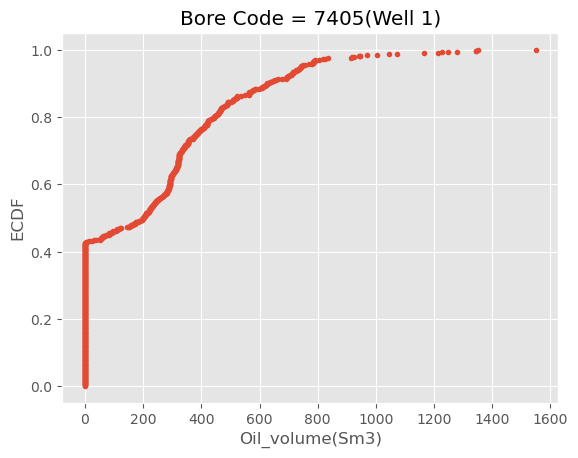

In [19]:
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y
x_axis,y_axis=ecdf(df_well1['BORE_OIL_VOL'])
plt.plot(x_axis,y_axis,marker='.',linestyle='none')

## Labels
plt.xlabel('Oil_volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7405(Well 1)')



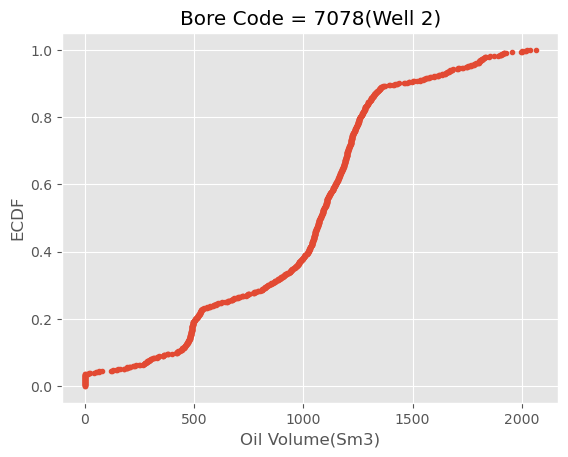

In [20]:
x_axis, y_axis = ecdf(df_well2['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7078(Well 2)')

plt.show()

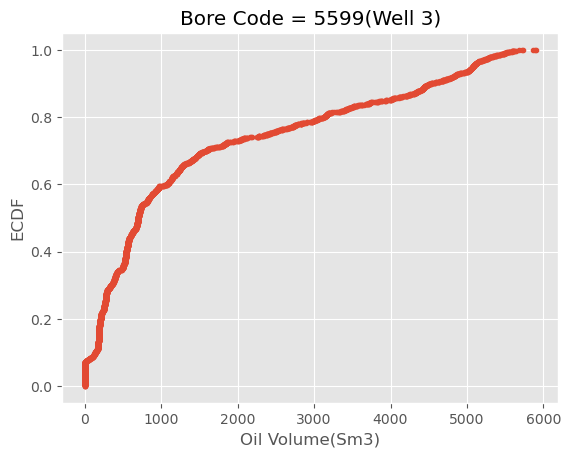

In [21]:
x_axis, y_axis = ecdf(df_well3['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5599(Well 3)')

plt.show()

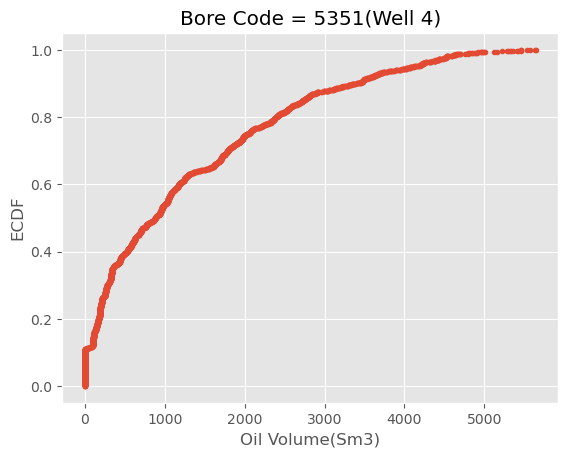

In [22]:
x_axis, y_axis = ecdf(df_well4['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5351(Well 4)')

plt.show()

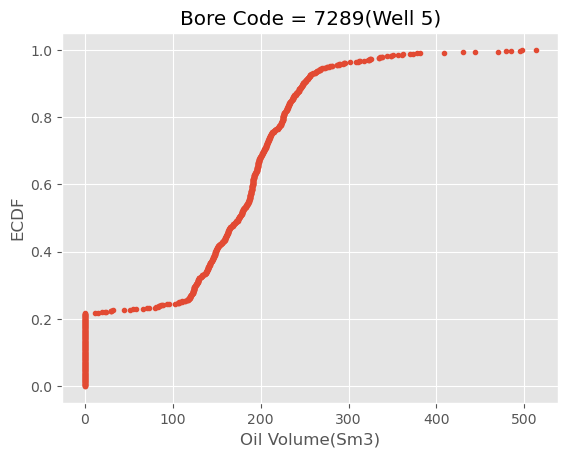

In [23]:
x_axis, y_axis = ecdf(df_well5['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7289(Well 5)')

plt.show()

Text(0.5, 1.0, 'Bore Code = 5693(Well 6)')

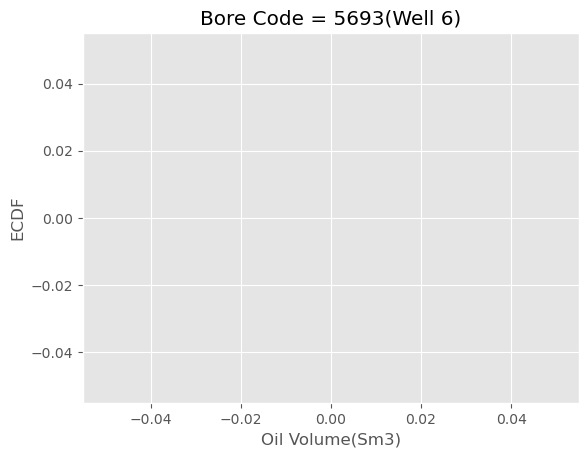

In [24]:
#injector well

x_axis, y_axis = ecdf(df_well6['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5693(Well 6)')

#plt.show()

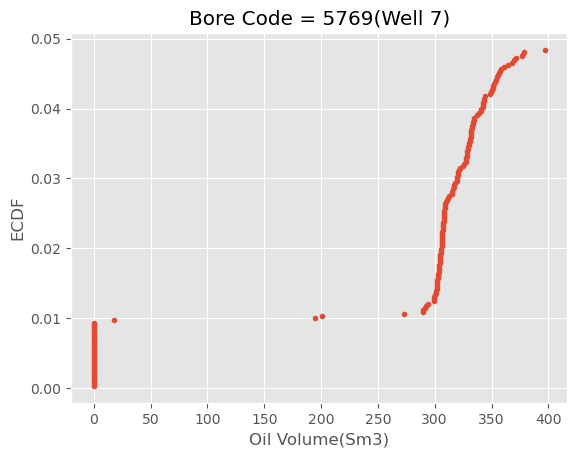

In [25]:
#Injector and producer for some time


x_axis, y_axis = ecdf(df_well7['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5769(Well 7)')

plt.show()

## From the ECDF plots of Oil Production, it can be seen that in Well 1 40% of total data points has 0 Bore Oil Production, and for Well 5 20% of total data points has 0 Bore Oil Production, and these are not NA values these are 0 production points (well is not flowing). So, we will not take these two wells for our model training. Also, it can be seen that ECDF of well 6 is empty, and missing values for Well 7 also, which make the possibility that these wells are injectors. So, we will plot the ECDF of Water Injection volume for these wells.

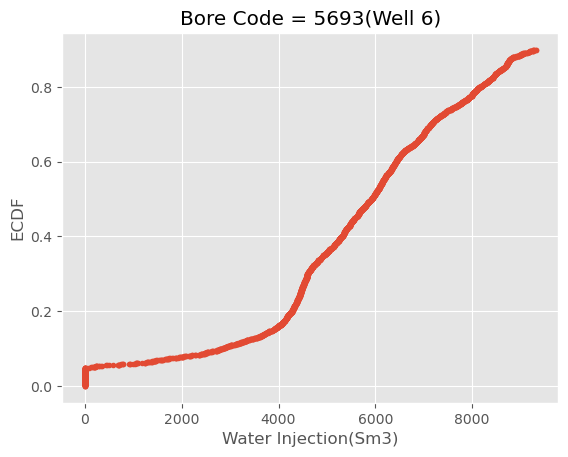

In [26]:
x_axis, y_axis = ecdf(df_well6['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5693(Well 6)')

plt.show()

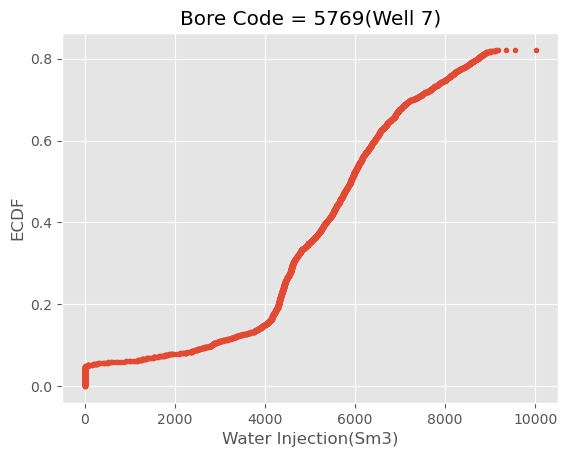

In [27]:
x_axis, y_axis = ecdf(df_well7['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5769(Well 7)')

plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Box Plot</p>

### Now next step is to get the boxplots of features for each wellbore for properly understanding the statistics of the dataset, knowing the distribution of features.

In [28]:
df1=df.select_dtypes(include='float')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ON_STREAM_HRS             15349 non-null  float64
 1   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 3   AVG_DP_TUBING             8980 non-null   float64
 4   AVG_ANNULUS_PRESS         7890 non-null   float64
 5   AVG_CHOKE_SIZE_P          8919 non-null   float64
 6   AVG_WHP_P                 9155 non-null   float64
 7   AVG_WHT_P                 9146 non-null   float64
 8   DP_CHOKE_SIZE             15340 non-null  float64
 9   BORE_OIL_VOL              9161 non-null   float64
 10  BORE_GAS_VOL              9161 non-null   float64
 11  BORE_WAT_VOL              9161 non-null   float64
 12  BORE_WI_VOL               5706 non-null   float64
dtypes: float64(13)
memory usage: 1.6 MB


In [30]:
import seaborn as sns

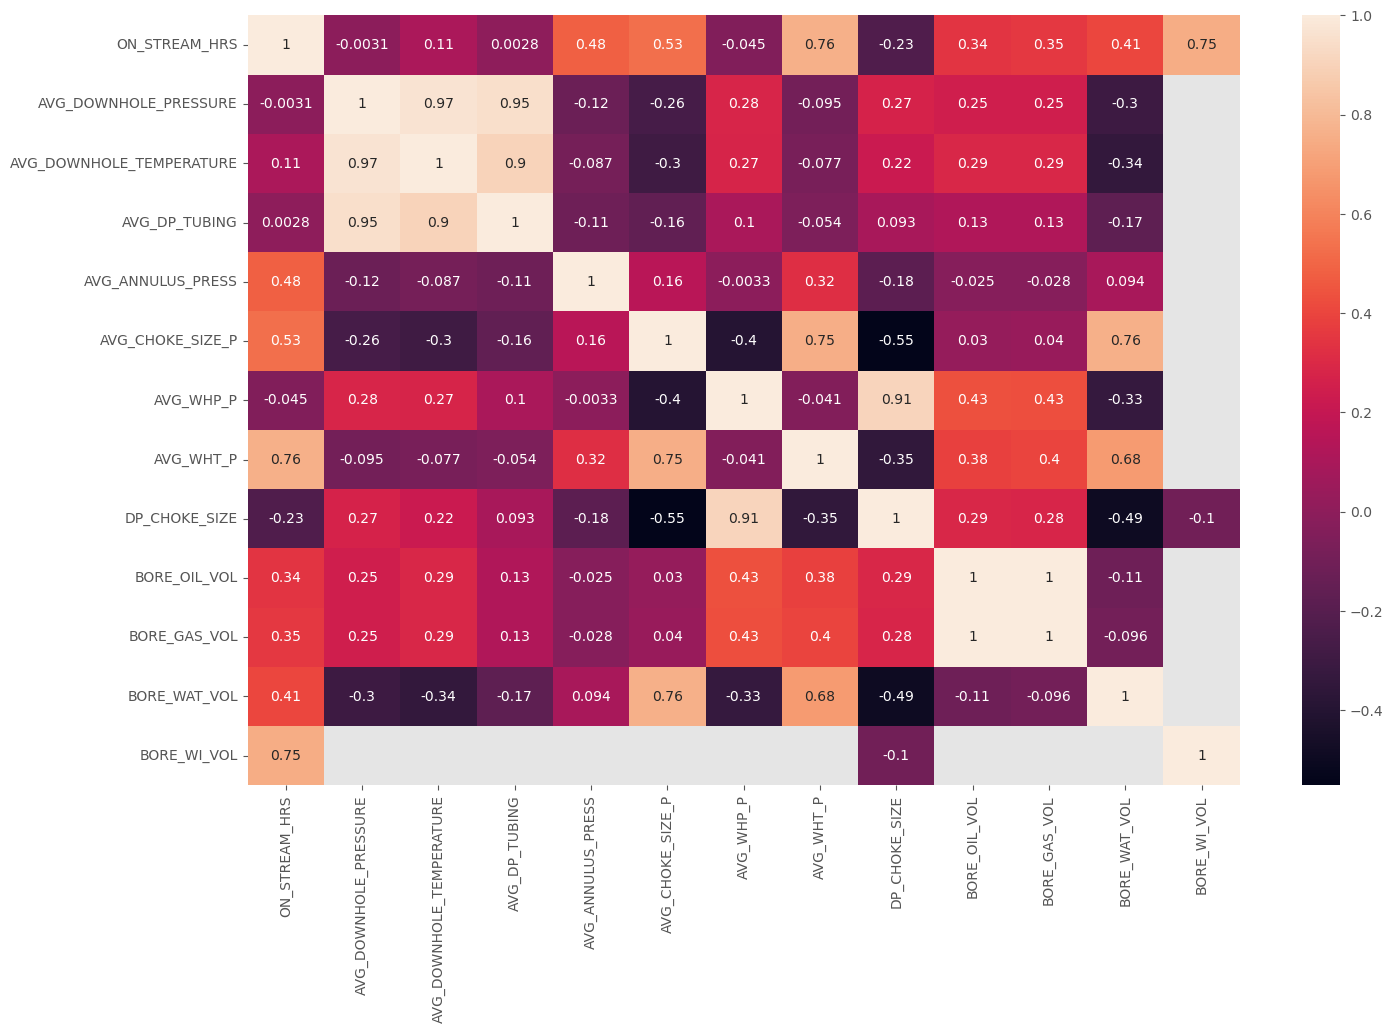

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [32]:
## Selectig Highly correlated feature
def correlation(dataset,threshold):
    col_corr=set()
    col_matrix=dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if (col_matrix.iloc[i,j])>threshold:
                col_name=col_matrix.columns[i]
                col_corr.add(col_name)
                
    return col_corr

In [33]:
corr_features = correlation(df1, 0.99)
len(set(corr_features))

1

In [34]:
list(corr_features)

['BORE_GAS_VOL']

<AxesSubplot:xlabel='NPD_WELL_BORE_CODE', ylabel='BORE_WI_VOL'>

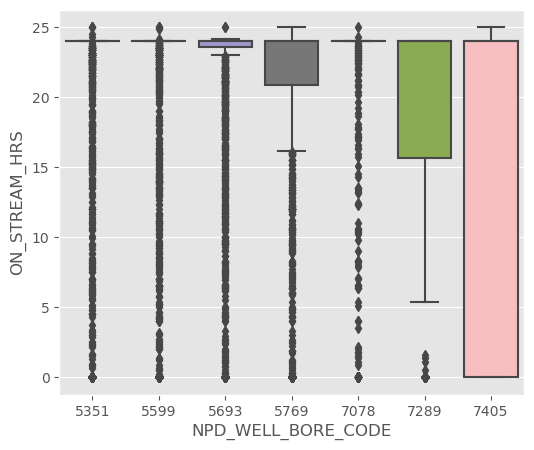

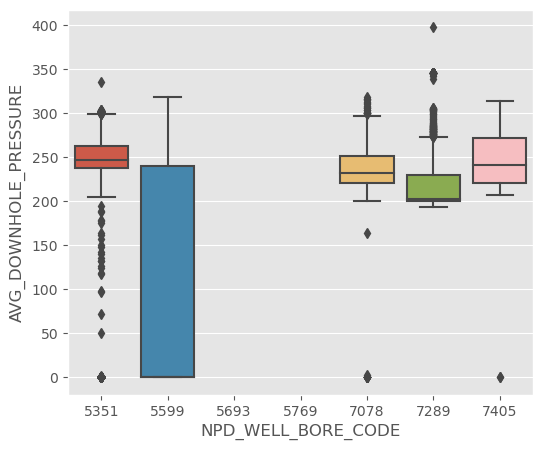

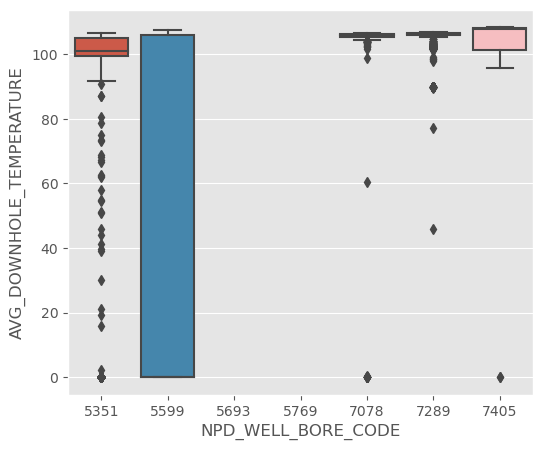

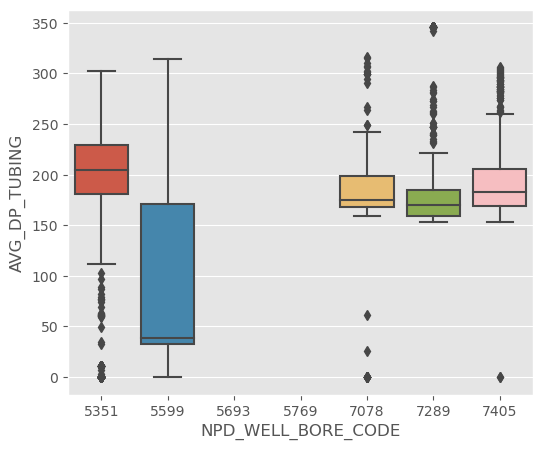

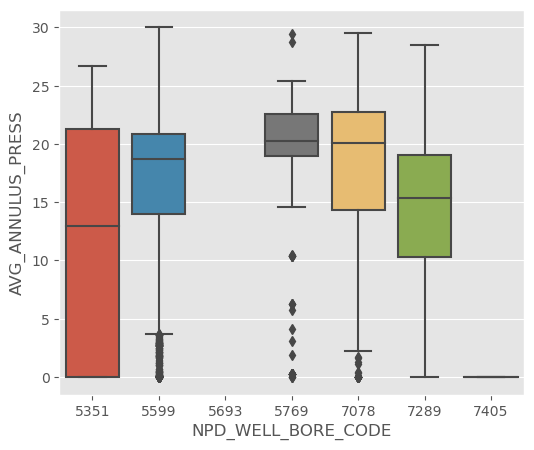

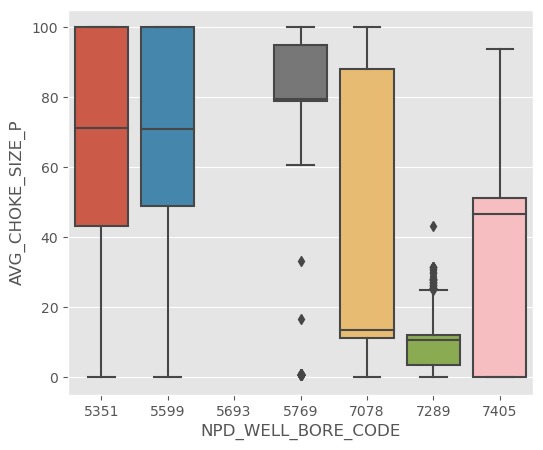

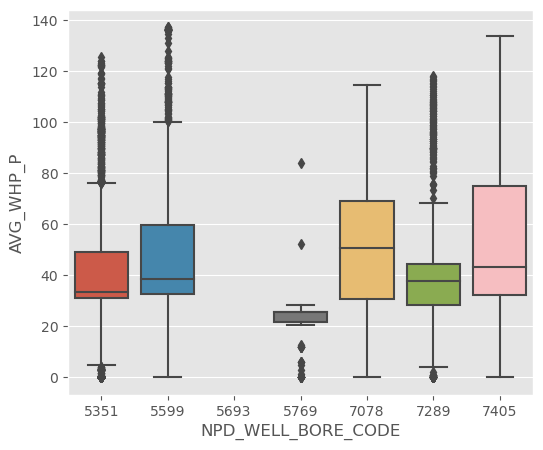

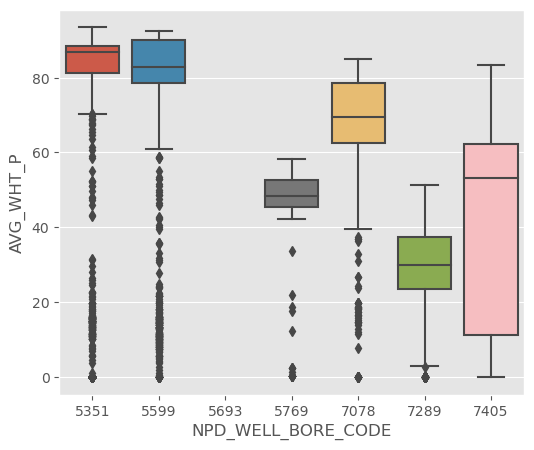

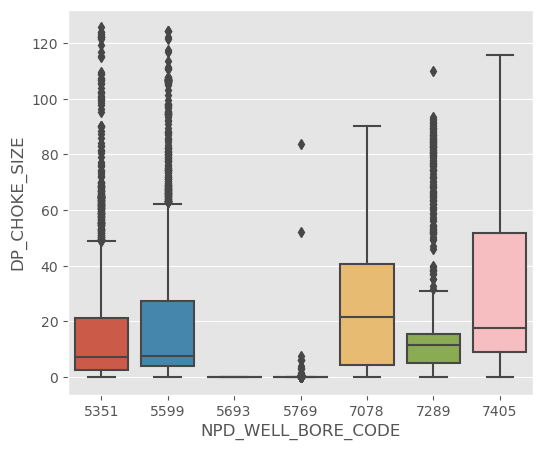

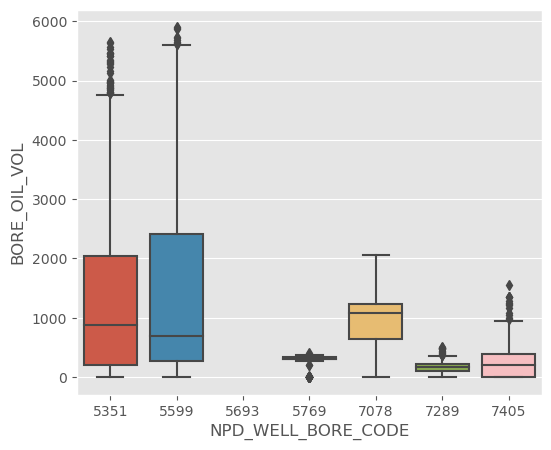

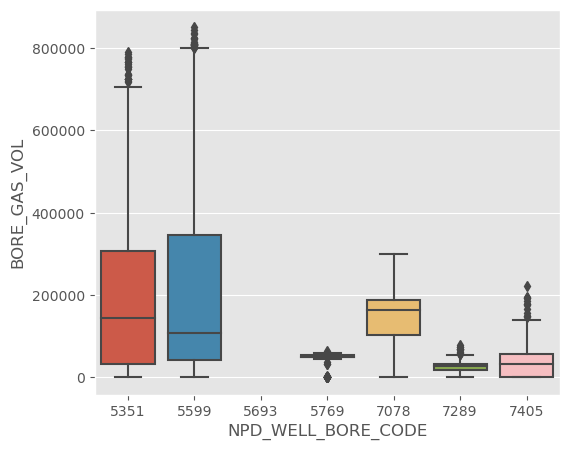

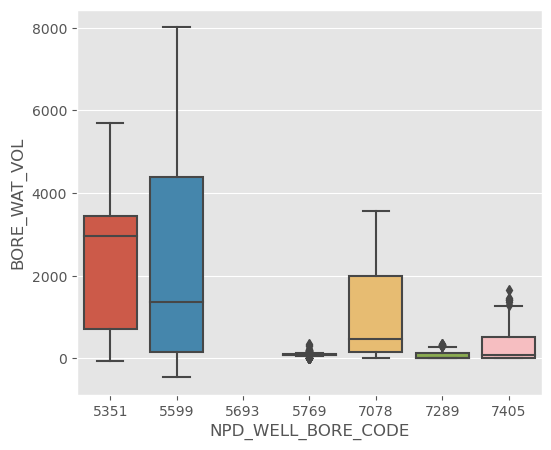

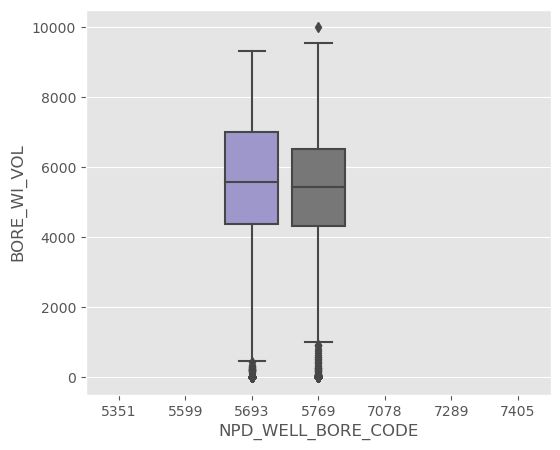

In [43]:
#Plotting boxplots for all the main features to visualize the distribution of data
#%matplotlib notebook
figuresizes = (6,5)
plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'ON_STREAM_HRS', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DOWNHOLE_PRESSURE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DOWNHOLE_TEMPERATURE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DP_TUBING', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_ANNULUS_PRESS', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_CHOKE_SIZE_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_WHP_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_WHT_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'DP_CHOKE_SIZE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_OIL_VOL', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_GAS_VOL', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_WAT_VOL', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_WI_VOL', data=df)

## From the box plot it is clear that the data is highly skewed and depends on well so while dealing with the null values we cannot use the mean method.